# Stock Forecasting using Prophet Part 2

https://facebook.github.io/prophet/

In [1]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
stock = 'AMD' # input
start = '2017-01-01' # input 
end = '2021-11-08'  # input
df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,11.42,11.65,11.02,11.43,11.43,55182000
2017-01-04,11.45,11.52,11.24,11.43,11.43,40781200
2017-01-05,11.43,11.69,11.23,11.24,11.24,38855200
2017-01-06,11.29,11.49,11.11,11.32,11.32,34453500
2017-01-09,11.37,11.64,11.31,11.49,11.49,37304800


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-01,119.449997,125.669998,118.129997,125.230003,125.230003,54559800
2021-11-02,124.980003,128.460007,124.199997,127.629997,127.629997,53491900
2021-11-03,127.750000,130.600006,126.790001,130.529999,130.529999,59537800
2021-11-04,132.009995,139.000000,130.770004,137.500000,137.500000,84825200
2021-11-05,139.190002,141.220001,134.419998,136.339996,136.339996,64878000


In [5]:
df = df.reset_index()
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})
df

,ds,Open,High,Low,y,Adj Close,Volume
0,2017-01-03,11.420000,11.650000,11.020000,11.430000,11.430000,55182000
1,2017-01-04,11.450000,11.520000,11.240000,11.430000,11.430000,40781200
2,2017-01-05,11.430000,11.690000,11.230000,11.240000,11.240000,38855200
3,2017-01-06,11.290000,11.490000,11.110000,11.320000,11.320000,34453500
4,2017-01-09,11.370000,11.640000,11.310000,11.490000,11.490000,37304800
...,...,...,...,...,...,...,...
1216,2021-11-01,119.449997,125.669998,118.129997,125.230003,125.230003,54559800
1217,2021-11-02,124.980003,128.460007,124.199997,127.629997,127.629997,53491900
1218,2021-11-03,127.750000,130.600006,126.790001,130.529999,130.529999,59537800
1219,2021-11-04,132.009995,139.000000,130.770004,137.500000,137.500000,84825200


In [6]:
df = df[['ds', 'y']]
df.head()

,ds,y
0,2017-01-03,11.43
1,2017-01-04,11.43
2,2017-01-05,11.24
3,2017-01-06,11.32
4,2017-01-09,11.49


In [7]:
m = Prophet(daily_seasonality=True)
m.fit(df)

In [8]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1581,2022-11-01
1582,2022-11-02
1583,2022-11-03
1584,2022-11-04
1585,2022-11-05


In [9]:
future = list()
for i in range(1, 13):
	date = '2021-%02d' % i
	future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])

In [10]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
7,2021-08-01,100.984328,95.072906,107.104308
8,2021-09-01,105.807596,99.983489,111.912670
9,2021-10-01,105.710634,99.524426,111.650618
10,2021-11-01,109.362013,103.475438,115.333024
11,2021-12-01,110.733372,104.799855,116.275958


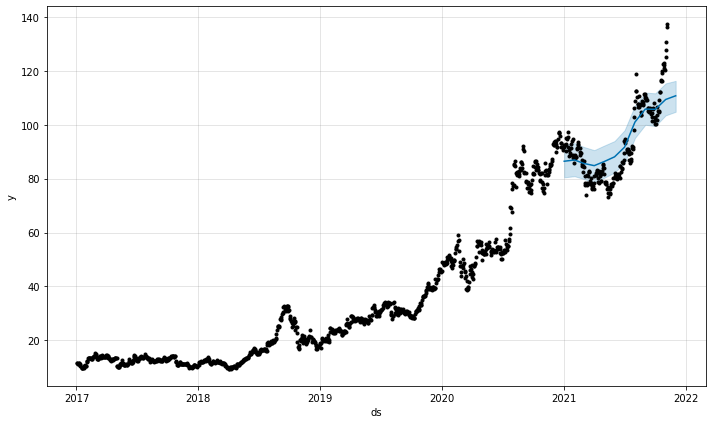

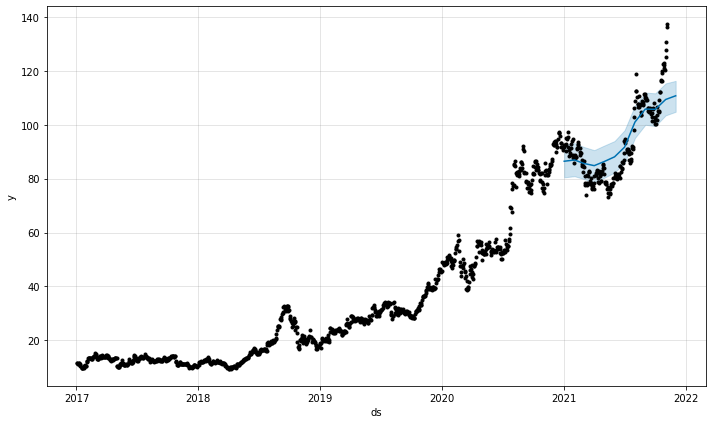

In [11]:
m.plot(forecast)


In [12]:
train = df.drop(df.index[-12:])
print(train.tail())

             ds           y
1204 2021-10-14  111.989998
1205 2021-10-15  112.120003
1206 2021-10-18  116.430000
1207 2021-10-19  116.330002
1208 2021-10-20  116.389999


In [13]:
from sklearn.metrics import mean_absolute_error

y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 30.235


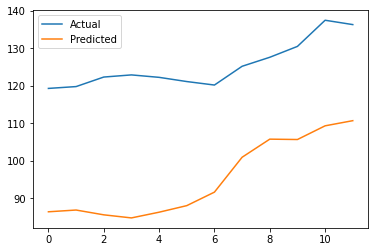

In [14]:
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()